In [ ]:
# 붓꽃 데이터회귀

In [3]:
# 라이브러리 로딩
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 데이터분할
y = df['petal width (cm)']
X = df.drop(['petal width (cm)'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# 학습 모델1 - 선형 회귀 모델
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# 학습
lr_model.fit(X_train, y_train)
print('weight:', lr_model.coef_)
print('bias:',lr_model.intercept_)

weight: [-0.24488106  0.24482729  0.53764071]
bias: -0.1491639103657183


In [ ]:
# 평가
score = lr_model.score(X_test, y_test)
print('선형회귀 모델 R2: {0:.2f}'.format(score))

선형회귀 모델 R2: 0.94


<Axes: >

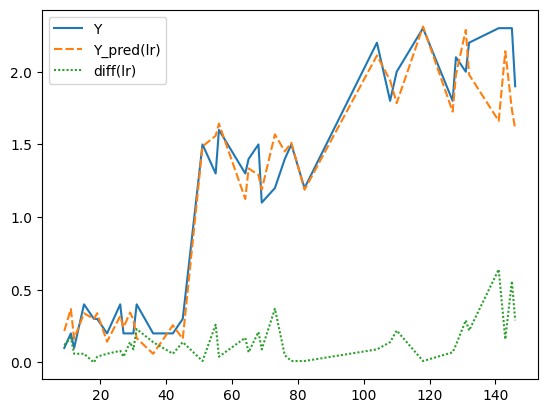

In [6]:
# 예측결과 시각화
y_pred = lr_model.predict(X_test)
lr_df = pd.DataFrame(data = {'Y': y_test, 'Y_pred(lr)': y_pred, 'diff(lr)': np.round(np.abs(y_test - y_pred), 2)})
sns.lineplot(data=lr_df)

In [ ]:
#학습 - 의사결정나무 기반의 회귀 알고리즘

In [7]:
from sklearn.tree import DecisionTreeRegressor

# 학습 - DecisionTreeRegressor 
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 평가
score = tree_model.score(X_test, y_test)
print('의사결정나무 R2: {0:.2f}'.format(score))

의사결정나무 R2: 0.87


In [8]:
# 예측결과 
y_pred = tree_model.predict(X_test)

tree_df = pd.DataFrame(data = {'Y': y_test, 'Y_pred(tree)': y_pred, 'diff(tree)': np.round(np.abs(y_test - y_pred), 2)})
tree_df.sort_values(by=['diff(tree)'], ascending=False).head(10)

,Y,Y_pred(tree),diff(tree)
118,2.3,1.4,0.9
141,2.3,1.5,0.8
143,2.3,1.8,0.5
132,2.2,1.8,0.4
104,2.2,1.8,0.4
146,1.9,1.5,0.4
128,2.1,1.8,0.3
108,1.8,1.5,0.3
110,2.0,1.7,0.3
64,1.3,1.0,0.3


In [ ]:
# 위 dataframe 설명

'''

각 칼럼은 실제 값과 트리 모델의 예측 값을 비교하여,
두 값의 차이까지 보여줍니다.

Y = 테스트 데이터의 실제 정답값
Y_Pred(tree) = 트리 모델이 테스트 데이터를 기반으로 예측하 값
diff(tree) = 실제 값과 예측값 사이의 차이의 절대값을 소수점 둘째짜리까지 반올림한 값
즉, 예측 오차의 크기를 나타낸다.


'''

<Axes: >

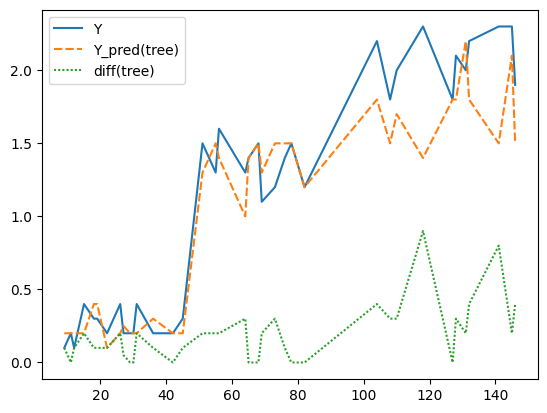

In [9]:
#예측결과 시각화
sns.lineplot(data = tree_df)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

model_list = [forest_model, lgb_model, xgb_model]

for model in model_list:
    model.fit(X_train , y_train)
    score = model.score(X_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 모델 R2: {1:.2f}'.format(model_name, score))    

RandomForestRegressor 모델 R2: 0.94
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 3
[LightGBM] [Info] Start training from score 1.214286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

In [12]:
model_list = [lr_model, tree_model, forest_model, lgb_model, xgb_model]

for model in model_list:
    y_preds = model.predict(X_test)    
    print('{0} 모델'.format(model.__class__.__name__))   
    printRegressorResult(y_test, y_preds)

LinearRegression 모델
MSE : 0.040 , RMSE : 0.201, r2 : 0.937
DecisionTreeRegressor 모델
MSE : 0.081 , RMSE : 0.284, r2 : 0.874
RandomForestRegressor 모델
MSE : 0.041 , RMSE : 0.204, r2 : 0.935
LGBMRegressor 모델
MSE : 0.031 , RMSE : 0.176, r2 : 0.952
XGBRegressor 모델
MSE : 0.052 , RMSE : 0.228, r2 : 0.919


In [ ]:
# 결과 값 해석

'''

MSE : 평균 제곱 오차 _ 예측값과 실제값의 차이를 제곱해 평균낸 오차이다.
-> 값이 작을 수록 해당 모델이 더 정확히 예측했다는 의미입니다.
RMSE: 평균 제곱근 오차 _ MSE에 루트를 씌운 값으로, 오차의 단위가 실제 타겟과 동일해 해석하기 편하다.
R2 : 결정계수 _ 모델의 설명력을 나타내는 지표로 1에 가까울 수록 모델이 실제 데이어틀 더 잘 설명한다.

'''